In [2]:
'''
Author : Arewa Morountudun Ojelade
Date : 10/28/2025
Course: DATA 645 Machine Learning
Assignment: Exploratory Data Analysis: Credit Card Default
Academia: University of Maryland Global Campus
'''
%pip install -q pandas matplotlib numpy seaborn

## Outline

- [ 1 - Introduction](#1)
- [ 2 - Connect to Dataset](#2)
- [ 3 - Initial Dataset Cleaning](#3)
- [ 4 - Explore Dataset Statistics](#4)
- [ 5 - Exploratory Data Analysis (EDA)](#5)
  - [ 5.1 Preprocessing](#5.1)
  - [ 5.2 Handling Outliers](#5.2)
  - [ 5.3 Feature Engineering](#5.3)
  - [ 5.4 Dataset Splitting and Tiling](#5.4)
- [ 6 - Principal Component Analysis (PCA)](#6)
- [ 7 - Conclusion](#7)

<a name="1"></a>
## 1 - Introduction
### Exploratory Data Analysis: Credit Card Default
---

Credit card balances are unsecured debts that are not backed by an asset. Lenders' recovery prospects depend partly on the type of debt; consequently, it is crucial that lenders accurately assess borrowers' default probabilities for unsecured debt (Chen, 2024). This exploratory data analysis evaluates features that help determine the likelihood of client default using the dataset collected from the 2009 Default of Credit Card Clients research. The dataset contains client information from a Taiwanese bank, including credit limit, age, and sex, as well as the six-month payment history from April to September 2005, and the target feature, default status in October.

<a name="2"></a>
## 2 - Connect to Dataset
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.layers import Normalization
from sklearn.model_selection import GridSearchCV
df = pd.read_csv('DefaultCreditCardClients.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<a name="3"></a>
## 3 - Initial Dataset Cleaning
---
The target feature's name is too long; it is shortened and standardized to 'DEFAULT'.

Additionally, the dataset features start at 1. $'PAY\_0'$ is renamed to $'PAY\_1'$, to fit dataset standard. $ID$ column is not associated with the target feature, and is dropped.

In [2]:
df = df.rename(columns={'default payment next month': 'DEFAULT',
                        'PAY_0' : 'PAY_1'})
df.drop(columns=['ID'], inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Original dataset currency is in New Taiwan Dollars(NTD). Currency is converted to United States Dollar(USD) with the conversion formula at the time of publication for an appropriate frame of reference.

In [3]:
col_name = ['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
for col in col_name:
  df[col] = df[col] * .033 #convert into USD

The original dataset contained no missing values, and nominal features were pre-encoded as integer values documented in the research dataset documentation (Yeh, 2016). However, these codes were not standardized. One cleaning activity performed on this dataset was standardization of the encoded features.

In [4]:
df.loc[df['SEX'] == 1,'SEX'] = 0 # Standardize Male as 0
df.loc[df['SEX'] == 2, 'SEX'] = 1 # Standardize Female as 1

In [5]:
df.loc[df['EDUCATION'] == 3, 'EDUCATION'] = 0 # Standardize Highschool as 0
df.loc[df['EDUCATION'] == 2, 'EDUCATION'] = 5 # Placeholder
df.loc[df['EDUCATION'] == 1, 'EDUCATION'] = 2 # Standardize Graduate as 2
df.loc[df['EDUCATION'] == 4, 'EDUCATION'] = 3 # Standardize Other as 3
df.loc[df['EDUCATION'] == 5, 'EDUCATION'] = 1 # Standardize University as 1

In [6]:
df.loc[df['MARRIAGE'] == 2, 'MARRIAGE'] = 0 # Standardize Single as 0
df.loc[df['MARRIAGE'] == 3, 'MARRIAGE'] = 2 # Standardize  as Other as 2
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,660.0,1,1,1,24,2,2,-1,-1,-2,...,0.000,0.000,0.000,0.000,22.737,0.0,0.0,0.000,0.000,1
1,3960.0,1,1,0,26,-1,2,0,0,0,...,107.976,114.015,107.613,0.000,33.000,33.0,33.0,0.000,66.000,1
2,2970.0,1,1,0,34,0,0,0,0,0,...,472.923,493.284,513.117,50.094,49.500,33.0,33.0,33.000,165.000,0
3,1650.0,1,1,1,37,0,0,0,0,0,...,934.362,955.647,975.051,66.000,66.627,39.6,36.3,35.277,33.000,0
4,1650.0,0,1,1,57,-1,0,-1,0,0,...,691.020,631.818,631.323,66.000,1210.473,330.0,297.0,22.737,22.407,0


<a name="4"></a>
## 4 - Explore Dataset Statistics
---


Here, the dataset statistics is displayed and exported to a csv file.
We see that the $'LIMIT\_BAL'$ feature has a mean of \$5,526.98 USD, a minimum of \$330 USD, and a maximum of \$33,000 USD. The first quartile (Q1) is at \$1,650 USD, and the third quartile (Q3) is at \$7,920 USD, and the central tendency, or 50th percentile, is \$4,620 USD.

In [7]:
stats = df.describe()
stats.to_csv('stats.csv')
stats

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5526.982648,0.603733,1.205167,0.476833,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,1427.677316,1330.276232,1282.768093,186.898156,195.398396,172.447490,159.260537,158.379792,172.111585,0.221200
std,4281.672832,0.489129,0.730770,0.520582,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,2122.984252,2006.306140,1965.285549,546.588252,760.348723,581.029729,516.983272,504.184087,586.656371,0.415062
min,330.000000,0.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-5610.000000,-2684.022000,-11206.899000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1650.000000,0.000000,1.000000,0.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,76.782750,58.179000,41.448000,33.000000,27.489000,12.870000,9.768000,8.332500,3.885750,0.000000
50%,4620.000000,1.000000,1.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,628.716000,597.448500,563.343000,69.300000,66.297000,59.400000,49.500000,49.500000,49.500000,0.000000
75%,7920.000000,1.000000,2.000000,1.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1798.698000,1656.286500,1623.542250,165.198000,165.000000,148.665000,132.437250,133.039500,132.000000,0.000000
max,33000.000000,1.000000,6.000000,2.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,29422.338000,30596.643000,31734.912000,28827.216000,55580.547000,29569.320000,20493.000000,14075.457000,17445.978000,1.000000


 The central tendency for the bill amount is the mean value of the 50th percentile of all bill amount features:$$ \sum_{i=1}^{n=6} BILL\_AMT_i =\$648.43 $$

The central tendency for the payment amount is the mean value of the 50th percentile of all payment amount features:$$ \sum_{i=1}^{n=6} PAY\_AMT_i =\$57.24 $$

 The above is a calculation of the “mean of central tendencies”, which is the arithmetic average of the measures of central tendency. On average, customers’ payment central tendency is  8.82% of the bill amount.

 The visualization below displays the central tendency-dispersion plot for all six months of bill and payment amounts.


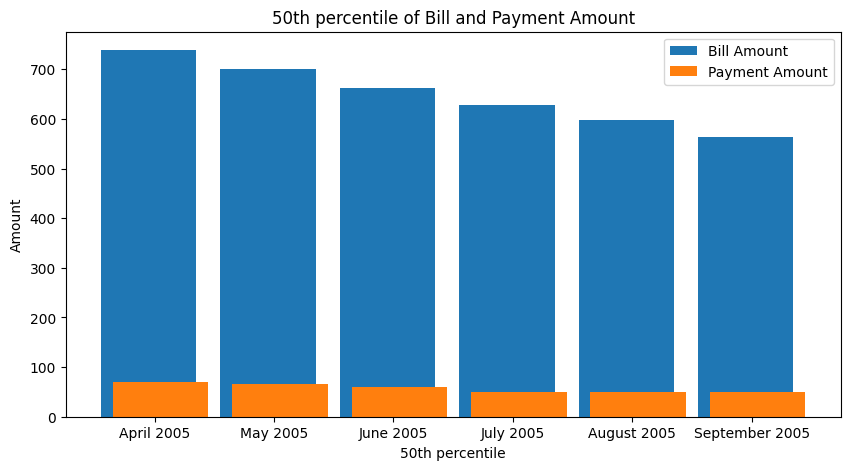

In [8]:
bill_stats = stats.loc['50%', 'BILL_AMT1':'BILL_AMT6']
pay_stats = stats.loc['50%', 'PAY_AMT1':'PAY_AMT6']

w, x = .1, np.arange(len(bill_stats))
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.bar(x - w/2, bill_stats.values, label='Bill Amount')
ax.bar(x + w/2, pay_stats.values, label='Payment Amount')
ax.set_xticks(x, ["April 2005", "May 2005", "June 2005", "July 2005","August 2005", "September 2005"])
ax.set_xlabel('50th percentile')
ax.set_ylabel('Amount')
ax.set_title('50th percentile of Bill and Payment Amount')
ax.legend()
plt.show()

<a name="5"></a>
## 5 - Exploratory Data Analysis (EDA)
---

The box plot visualization below displays the limit balance feature grouped by age. Notice the logistic trend between age and limit balance. The limit balance slowly increases until age 30, where it levels off, decreasing in the late 40s and then increasing again in the early 60s.


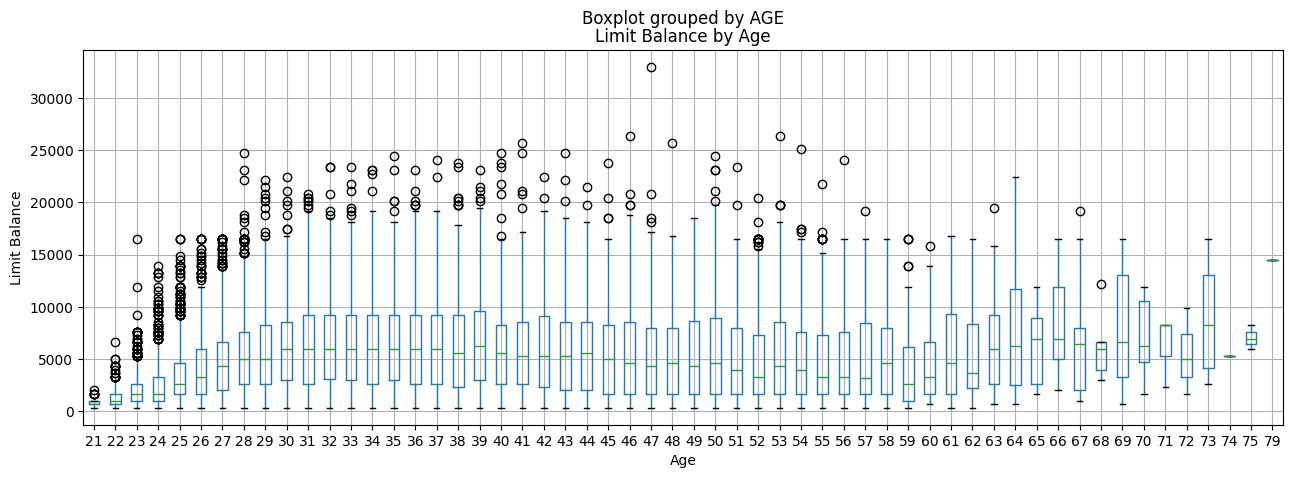

In [9]:
df.boxplot(column='LIMIT_BAL', by = "AGE", figsize=(15, 5))
plt.title('Limit Balance by Age',)
plt.xlabel('Age')
plt.ylabel('Limit Balance')
plt.show()
plt.show()


Here, the ethicality of the dataset is validated using a protected-feature distribution test. The $'SEX'$ feature is appropriately proportional satisfying the dataset for ethical modeling.

In [10]:
male = df[df['SEX'] == 0]
female = df[df['SEX'] == 1]
male_percentage = male.shape[0]/df.shape[0]
female_percentage = female.shape[0]/df.shape[0]

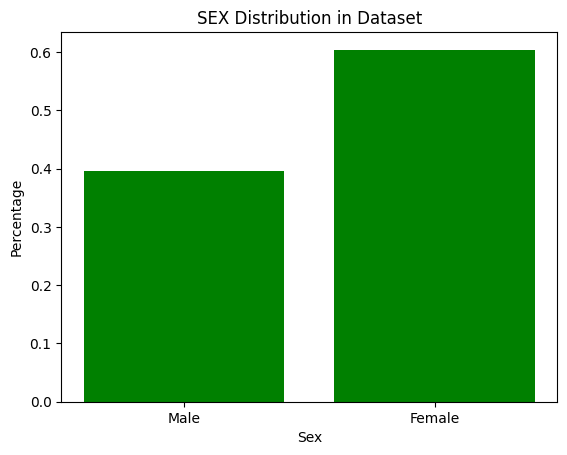

In [11]:
sex = ['Male', 'Female']
percentage = [male_percentage, female_percentage]
plt.bar(sex, percentage, color=['green'])
plt.title('SEX Distribution in Dataset')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.show()

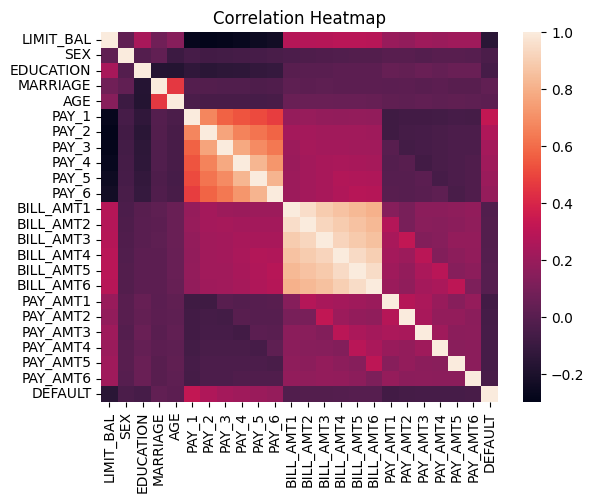

In [12]:
sns.heatmap(df.corr())
plt.title('Correlation Heatmap')
plt.show()

<a name="5.1"></a>
### 5.1 - Preprocessing
---


The research documentation associated with the dataset does not refer to the representation of the values 0 and -2 for the features '$PAY\_i$'.

“The measurement scale for the repayment status is: -1 = *pay duly*; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above” (Yeh, 2016).

The explained format, as well as the delinquency distribution, lays the foundation for the following assumptions.

1. Delinquency values are positive.
2. Repayment status of pay duly is represented by 0.


To rectify this discrepancy, all delinquency values were set to the absolute value of the original value, and for this report, zero is recognized as *pay duly*. Below displays the distribution of payment delinquency based on the assumptions made in this preprocessing step.


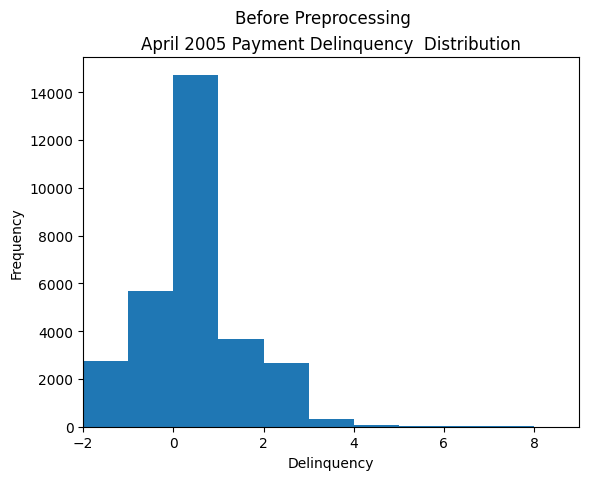

In [13]:
df['PAY_1'].plot(kind='hist',title="April 2005 Payment Delinquency  Distribution",

                     xlim=(df['PAY_1'].min(), df['PAY_1'].max()+1),
                     xlabel='Delinquency', ylabel='Frequency')
plt.suptitle('Before Preprocessing')
plt.show()

In [14]:
col_names = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in col_names:
  df[col] = df[col].abs()
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,660.0,1,1,1,24,2,2,1,1,2,...,0.000,0.000,0.000,0.000,22.737,0.0,0.0,0.000,0.000,1
1,3960.0,1,1,0,26,1,2,0,0,0,...,107.976,114.015,107.613,0.000,33.000,33.0,33.0,0.000,66.000,1
2,2970.0,1,1,0,34,0,0,0,0,0,...,472.923,493.284,513.117,50.094,49.500,33.0,33.0,33.000,165.000,0
3,1650.0,1,1,1,37,0,0,0,0,0,...,934.362,955.647,975.051,66.000,66.627,39.6,36.3,35.277,33.000,0
4,1650.0,0,1,1,57,1,0,1,0,0,...,691.020,631.818,631.323,66.000,1210.473,330.0,297.0,22.737,22.407,0


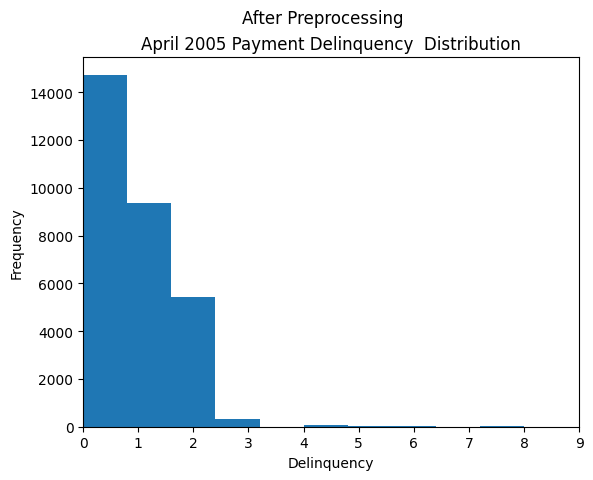

In [15]:
df['PAY_1'].plot(kind='hist',title="April 2005 Payment Delinquency  Distribution",
                     xlim=(df['PAY_1'].min(), df['PAY_1'].max()+1),
                     xlabel='Delinquency', ylabel='Frequency')
plt.suptitle('After Preprocessing')
plt.show()
plt.show()


<a name="5.2"></a>
### 5.2 - Handling Outliers
---

Outliers were handled by leveraging the Z-score  formula to eliminate the bill and payment averages  $ \ge| 3 \sigma| $ (standard deviations).

$$
z = \frac{x - \mu}{\sigma}
$$

In [16]:
# Determine the average bill and payment amounts of all six months
df['AVG_BILL_AMT'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
df['AVG_PAY_AMT'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)


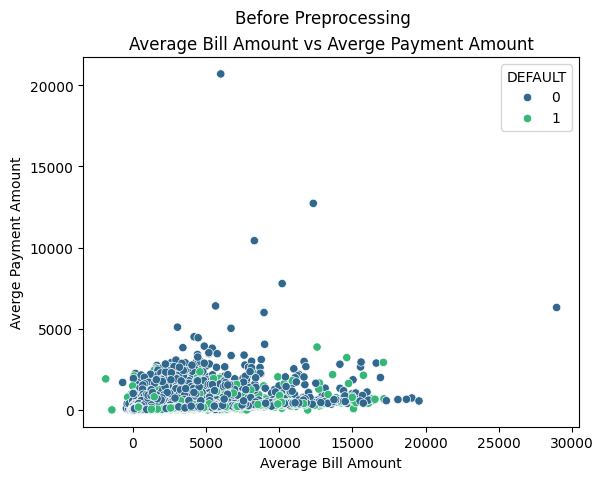

In [17]:
sns.scatterplot(data=df, x='AVG_BILL_AMT', y='AVG_PAY_AMT', hue='DEFAULT', palette='viridis')
plt.suptitle('Before Preprocessing')
plt.title('Average Bill Amount vs Averge Payment Amount')
plt.xlabel('Average Bill Amount')
plt.ylabel('Averge Payment Amount')
plt.show()

In [18]:
# Calculate the z-score for each customer's averge bill and payment amount
df['BILL_ZSCORE'] = (df['AVG_BILL_AMT'] - df['AVG_BILL_AMT'].mean()) / df['AVG_BILL_AMT'].std()
df['PAY_ZSCORE'] = (df['AVG_PAY_AMT'] - df['AVG_PAY_AMT'].mean()) / df['AVG_PAY_AMT'].std()

# Eliminate outliers with a z-score greater than the absolute value
# of 3 standard deviations
df = df[(df['BILL_ZSCORE'].abs() < 3) & (df['PAY_ZSCORE'].abs() < 3)]

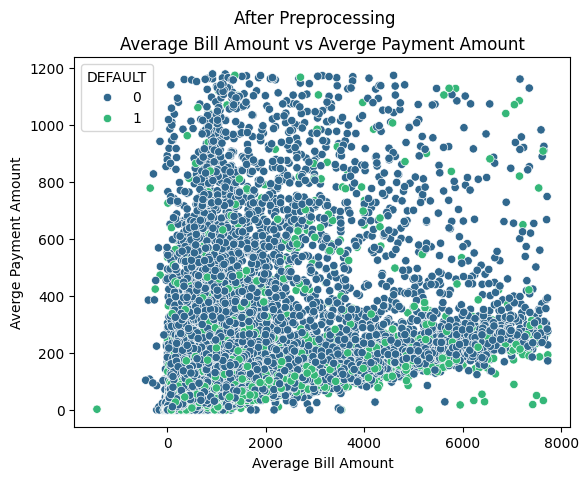

In [19]:
sns.scatterplot(data=df, x='AVG_BILL_AMT', y='AVG_PAY_AMT', hue='DEFAULT', palette='viridis')
plt.suptitle('After Preprocessing')
plt.title('Average Bill Amount vs Averge Payment Amount')
plt.xlabel('Average Bill Amount')
plt.ylabel('Averge Payment Amount')
plt.show()

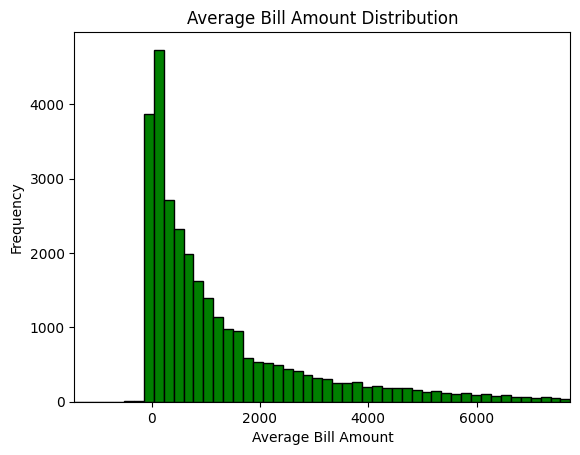

In [20]:
df['AVG_BILL_AMT'].plot(kind='hist',title="Average Bill Amount Distribution",
                     xlim=(df['AVG_BILL_AMT'].min(), df['AVG_BILL_AMT'].max()+1),
                     xlabel='Average Bill Amount', ylabel='Frequency',
                     edgecolor='black', color='green', bins=50)
plt.show()

<a name="5.3"></a>
### 5.3 - Feature Engineering
---
The quotient of each customer’s average bill amount and the limit balance was used to construct the utilization percentage feature. As the average utilization percentage increases, the maximum limit balance decreases. There is a higher concentration of defaults at lower balance limits.

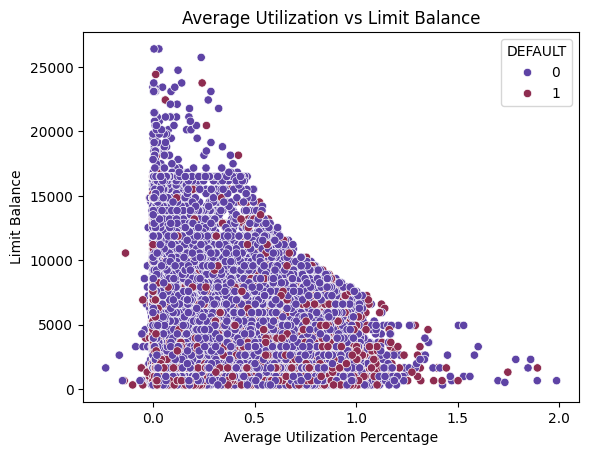

In [21]:
df['UTILIZATION'] = df['AVG_BILL_AMT']/df['LIMIT_BAL']
util_plot = df.loc[df['UTILIZATION'] <= 2, 'UTILIZATION']
sns.scatterplot(data=df, x=util_plot, y='LIMIT_BAL',
                hue='DEFAULT', palette='twilight')
plt.title('Average Utilization vs Limit Balance')
plt.xlabel('Average Utilization Percentage')
plt.ylabel('Limit Balance')
plt.show()

<a name="5.4"></a>
### 5.4 - **Dataset Splitting and Tiling**
---


The dataset's initial default to non default proprortion is 22% to 78%

In [22]:
default = df.loc[df['DEFAULT'] == 1]
default_percentage = default.shape[0]/df.shape[0]
not_default = df.loc[df['DEFAULT'] == 0]
not_default_percentage = not_default.shape[0]/df.shape[0]
print(f"{default_percentage:.2f} of the dataset has defaulted")
print(f"{not_default_percentage:.2f} of the dataset has not defaulted")
# print(df.loc[df['Default']==1].shape)

0.22 of the dataset has defaulted
0.78 of the dataset has not defaulted


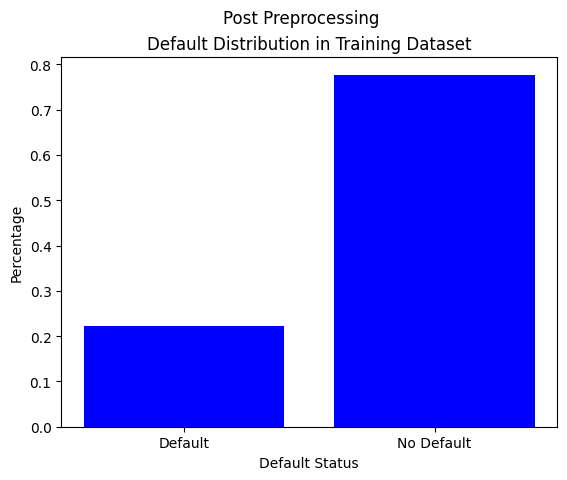

In [23]:

status = ['Default', 'No Default']
percentage = [default_percentage, not_default_percentage]
plt.bar(status, percentage, color=['blue'])
plt.suptitle('Post Preprocessing')
plt.title('Default Distribution in Training Dataset')
plt.xlabel('Default Status')
plt.ylabel('Percentage')
plt.show()

---

To ensure there are enough default instances for an accurate model, the dataset was split into training and test sets to prevent data leakage, retaining the initial default status distribution. Next, the training set was separated by default status, and the training dataframe with status 1 (default) was tiled or expanded by a multiple of 3, increasing the proportion of positive default status to 46%.


In [24]:
# Separte target Feature from training features.
y = df['DEFAULT']
X = df.drop(columns=['DEFAULT', 'AVG_BILL_AMT', 'BILL_ZSCORE', 'AVG_PAY_AMT', 'PAY_ZSCORE'])
# Split dataset to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Combine training set to prepare for tiling
train_df = pd.concat([X_train, y_train], axis=1)
columns = train_df.columns
train_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,UTILIZATION,DEFAULT
8530,1650.0,1,1,0,25,0,0,0,0,0,...,868.857,855.459,59.400,46.200,30.195,49.50,49.500,66.000,0.553050,0
15792,990.0,1,1,0,23,0,0,0,2,0,...,478.797,559.746,42.900,66.000,36.300,33.00,89.100,16.500,0.451139,1
13062,1650.0,1,0,0,48,0,0,0,0,0,...,949.410,954.657,49.500,99.000,39.600,39.60,38.346,33.000,0.615887,0
2804,3960.0,1,1,1,30,1,1,1,1,0,...,22.638,27.588,22.638,22.638,45.276,0.00,27.588,22.638,0.006878,0
5387,1650.0,0,1,0,23,1,1,0,0,1,...,46.860,0.000,495.000,669.900,313.500,46.86,0.000,0.000,0.170003,1


In [26]:
# Separate training set on default status to enable tiling of default status
default = train_df.loc[train_df['DEFAULT'] == 1]
default_percentage = default.shape[0]/train_df.shape[0]
not_default = train_df.loc[train_df['DEFAULT'] == 0]
not_default_percentage = not_default.shape[0]/train_df.shape[0]
# Ensure initial default porportions
print(f"{default_percentage:.2f} of the dataset has defaulted")
print(f"{not_default_percentage:.2f} of the dataset has not defaulted")

0.22 of the dataset has defaulted
0.78 of the dataset has not defaulted


In [27]:
# Tile training set with default status
default1 = np.tile(default,(3,1))
print(default1.shape)
print(not_default.shape)

(15561, 25)
(17930, 25)


In [28]:
default1 = pd.DataFrame(default1,columns=columns)
default1.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,UTILIZATION,DEFAULT
0,990.0,1.0,1.0,0.0,23.0,0.0,0.0,0.0,2.0,0.0,...,478.797,559.746,42.900,66.000,36.300,33.000,89.100,16.500,0.451139,1.0
1,1650.0,0.0,1.0,0.0,23.0,1.0,1.0,0.0,0.0,1.0,...,46.860,0.000,495.000,669.900,313.500,46.860,0.000,0.000,0.170003,1.0
2,2640.0,0.0,1.0,1.0,36.0,0.0,0.0,0.0,0.0,0.0,...,2563.077,2629.011,95.700,128.700,90.750,92.400,105.600,97.812,0.986740,1.0
3,1650.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0,...,1545.852,1568.721,63.426,72.600,66.000,46.200,66.000,74.910,0.957197,1.0
4,7260.0,1.0,2.0,0.0,27.0,1.0,1.0,1.0,1.0,1.0,...,110.616,110.616,110.616,110.616,110.616,110.616,110.616,110.616,0.015236,1.0


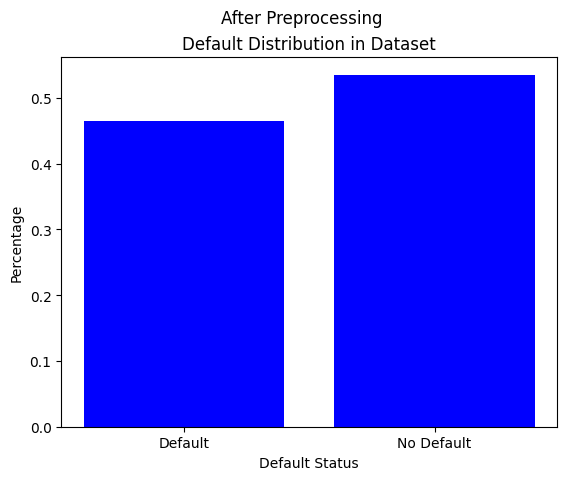

In [29]:
# Re-combine final training set and verify increased porportions.
status = ['Default', 'No Default']
default = pd.DataFrame(default1)
not_default =pd.DataFrame(not_default)
train_df = pd.concat([default, not_default])
default_percentage = default.shape[0]/train_df.shape[0]
not_default_percentage = not_default.shape[0]/train_df.shape[0]
percentage = [default_percentage, not_default_percentage]
plt.bar(status, percentage, color=['blue'])
plt.suptitle('After Preprocessing')
plt.title('Default Distribution in Dataset')
plt.xlabel('Default Status')
plt.ylabel('Percentage')
plt.show()

In [30]:
print(f"{default_percentage:.2f} of the dataset has defaulted")
print(f"{not_default_percentage:.2f} of the dataset has not defaulted")

0.46 of the dataset has defaulted
0.54 of the dataset has not defaulted


In [31]:
train_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,UTILIZATION,DEFAULT
0,990.0,1.0,1.0,0.0,23.0,0.0,0.0,0.0,2.0,0.0,...,478.797,559.746,42.900,66.000,36.300,33.000,89.100,16.500,0.451139,1.0
1,1650.0,0.0,1.0,0.0,23.0,1.0,1.0,0.0,0.0,1.0,...,46.860,0.000,495.000,669.900,313.500,46.860,0.000,0.000,0.170003,1.0
2,2640.0,0.0,1.0,1.0,36.0,0.0,0.0,0.0,0.0,0.0,...,2563.077,2629.011,95.700,128.700,90.750,92.400,105.600,97.812,0.986740,1.0
3,1650.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0,...,1545.852,1568.721,63.426,72.600,66.000,46.200,66.000,74.910,0.957197,1.0
4,7260.0,1.0,2.0,0.0,27.0,1.0,1.0,1.0,1.0,1.0,...,110.616,110.616,110.616,110.616,110.616,110.616,110.616,110.616,0.015236,1.0


---

In [32]:
# Separate target feature for the final time and prepare for PCA
X_train = train_df.drop(columns=['DEFAULT'])
y_train = train_df['DEFAULT']
columns = X_train.columns
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,UTILIZATION
0,990.0,1.0,1.0,0.0,23.0,0.0,0.0,0.0,2.0,0.0,...,463.485,478.797,559.746,42.900,66.000,36.300,33.000,89.100,16.500,0.451139
1,1650.0,0.0,1.0,0.0,23.0,1.0,1.0,0.0,0.0,1.0,...,389.532,46.860,0.000,495.000,669.900,313.500,46.860,0.000,0.000,0.170003
2,2640.0,0.0,1.0,1.0,36.0,0.0,0.0,0.0,0.0,0.0,...,2547.600,2563.077,2629.011,95.700,128.700,90.750,92.400,105.600,97.812,0.986740
3,1650.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0,...,1573.539,1545.852,1568.721,63.426,72.600,66.000,46.200,66.000,74.910,0.957197
4,7260.0,1.0,2.0,0.0,27.0,1.0,1.0,1.0,1.0,1.0,...,110.616,110.616,110.616,110.616,110.616,110.616,110.616,110.616,110.616,0.015236


<a name="6"></a>
## 6 - Principal Component Analysis (PCA)
---

First, StandardScaler funcution imported from scikit-learn is used to transform the dataset such that the mean is zero with a standard deviation of one. (Z-score normalization)

In [33]:
# Scale training and test set
scaler_train = StandardScaler()
scaler_test = StandardScaler()
X_train = scaler_train.fit_transform(X_train)
X_test = scaler_test.fit_transform(X_test)
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,UTILIZATION
0,-0.982729,0.827492,-0.236094,-0.935796,-1.337263,-0.954471,-0.922456,-0.889748,1.136331,-0.798790,...,-0.467595,-0.428820,-0.354984,-0.297579,-0.210170,-0.273662,-0.259588,-0.085108,-0.298610,0.170897
1,-0.816271,-1.208471,-0.236094,-0.935796,-1.337263,0.136786,0.095736,-0.889748,-0.829772,0.191302,...,-0.515183,-0.721179,-0.737052,1.148859,1.697802,0.610368,-0.217525,-0.356470,-0.346388,-0.614509
2,-0.566584,-1.208471,-0.236094,0.978143,0.055682,-0.954471,-0.922456,-0.889748,-0.829772,-0.798790,...,0.873500,0.981938,1.057440,-0.128652,-0.012075,-0.100013,-0.079319,-0.034856,-0.063160,1.667202
3,-0.816271,-1.208471,-0.236094,0.978143,-1.122963,-0.954471,-0.922456,-0.889748,-0.829772,-0.798790,...,0.246707,0.293423,0.333715,-0.231909,-0.189318,-0.178945,-0.219528,-0.155461,-0.129476,1.584668
4,0.598621,0.827492,1.141917,-0.935796,-0.908664,0.136786,0.095736,0.111581,0.153280,0.191302,...,-0.694661,-0.678025,-0.661548,-0.080930,-0.069210,-0.036658,-0.024036,-0.019580,-0.026085,-1.046881


Here we explore the varaince explained by all the features contained in the dataset.

In [34]:
pca1 = PCA()
X_train
X_pca1 = pca1.fit_transform(X_train)

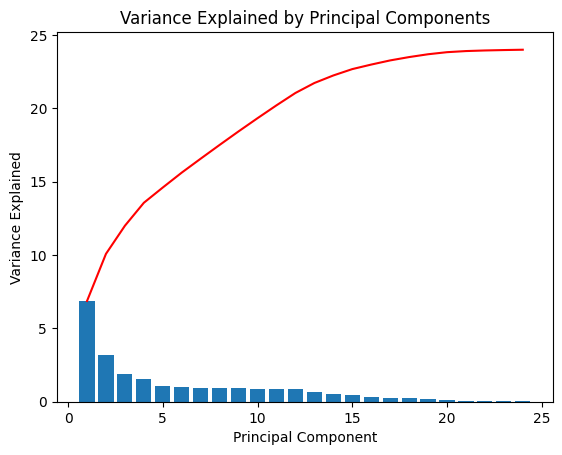

In [35]:
var = pca1.explained_variance_
plt.bar(range(1,len(var)+1), var)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.plot(range(1,len(var)+1), np.cumsum(var), color='red')
plt.show()

In [36]:
X_pca1.shape

(33491, 24)

Here we explore and visualize the variance explained by the two componenets that best explain the dataset.

In [37]:
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_train)
X_pca2.shape

(33491, 2)

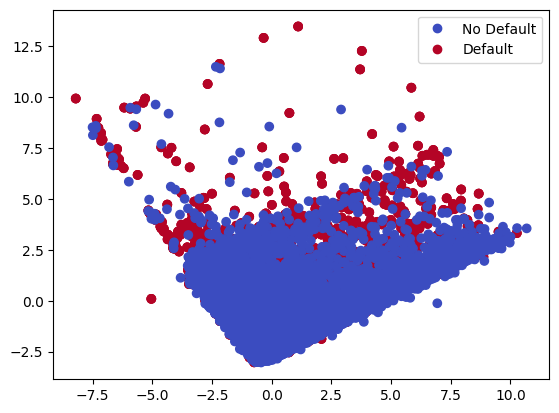

In [38]:
colormap = plt.colormaps['coolwarm']
plt.figure
scatter = plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y_train, cmap=colormap)
plt.legend(handles=scatter.legend_elements()[0], labels=['No Default', 'Default'])

Here we explore and visualize the variance explained by the three componenets that best explain the dataset for a 3d visualization.

In [39]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_train)
X_pca3.shape

(33491, 3)

In [40]:
total_var = pca3.explained_variance_ratio_.sum() * 100
print(f"Total Variance Explained: {total_var:.2f}%")

fig = px.scatter_3d(
    x=X_pca3[:,0],
    y=X_pca3[:,1],
    z=X_pca3[:,2],
    color=y_train,
    labels={'color': 'Default'},
    title=f'Total Variance Explained: {total_var:.2f}%',
)

fig.update_layout(scene = dict(
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    zaxis_title='Principal Component 3'
))
fig.show()

Total Variance Explained: 50.00%


Finally, a pca is conducted with components summarizing the dataset with a 95% variance.

In [41]:
pca = PCA(.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)
X_test_pca

array([[-0.30570292,  2.96193031, -1.66197809, ...,  1.05679982,
        -0.28246032, -0.33506091],
       [-0.19314526, -2.72340814,  0.02590106, ...,  0.31202045,
        -0.14426495, -0.06388966],
       [ 0.3209109 , -0.93307988, -1.62594141, ..., -0.45943224,
         1.08907942, -0.35378929],
       ...,
       [-2.22203497,  1.27200155, -1.79996088, ..., -0.17774491,
        -0.23291685,  0.08431894],
       [-2.04949397,  0.99635148, -2.14516582, ...,  0.12610071,
        -0.89145736,  0.25814889],
       [ 0.31143394, -1.86696878, -0.66885946, ...,  1.40245448,
         0.69081552,  0.7311804 ]])

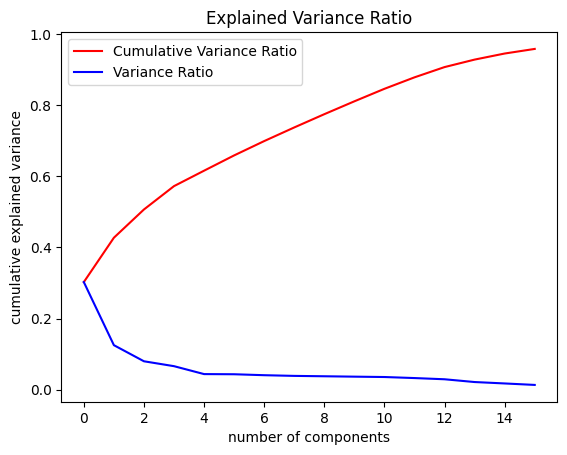

In [42]:
plt.plot(np.cumsum(pca.explained_variance_ratio_),color = 'red')
plt.plot(pca.explained_variance_ratio_, color = 'blue')
plt.legend(['Cumulative Variance Ratio', 'Variance Ratio'])
plt.title('Explained Variance Ratio')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [45]:
X_train_pca.shape

(33491, 16)

<a name="7"></a>
## 7 - Conclusion
---
In conclusion, risk analysis plays a critical role in lenders' decision-making when extending credit to a borrower. Since credit card balances are unsecured, uncollateralized debt, it is essential that lenders accurately assess borrowers' default risk. There are three primary considerations during risk analysis: Probability of Default (PD), Loss Given Default (LGD), and Exposure at Default (EAD). This Exploratory Data Analysis (EDA) focuses on PD analysis. The multivariate dataset used for this analysis was collected from the Default of Credit Card Clients research conducted in 2009, which included client information from a Taiwanese bank spanning a six-month payment history from April to September 2005, with the default status in October 2005.
